# BBC - Laboratoire 1
## Introduction aux bases de données biologiques et aux outils de recherche

- Professeur: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant: xavier Brochet (<a href="mailto:xavier.brochet@heig-vd.ch">xavier.brochet@heig-vd.ch</a>)

Date: Printemps 2020

> ## Objectifs pédagogiques
Pour réaliser ce laboratoire, du vocabulaire et des notions de base en biologie seront introduits ou perfectionnés. A la fin du laboratoire, l’étudiant devrait:
- Connaître plusieurs bases de données publiques du “National Center for Biotechnology Information” (Pubmed, Genbank) ainsi que Uniprot et Swiss-Prot.
- Connaître le système global de recherches inter-bases de données “Entrez Direct”.
- Savoir utiliser les outils d’alignement BLAST online et en ligne de commande (Biopython).

> ## But du labo
Vous allez recevoir une séquence ADN, à priori inconnue. Votre but est d’identifier l’organisme à qui appartient cette séquence, la protéine qui se cache derrière cette séquence, certaines de ses caractéristiques et l’état-de-l’art biologique sur cette protéine (recherche de littérature).

> ## Démarche
1. Identifier l’organisme et la protéine avec l’outil BLAST.
2. Rechercher des informations sur la séquence dans les bases de données Genbank et Uniprot.
3. Rechercher si des homologues chez l’humain existent avec l’outil BLAST.
4. Rechercher la littérature sur Pubmed pour établir l’état-de-l’art biologique sur cette protéine.

> ## Rapport de labo

> <p >Merci de répondre aux questions posées sur fond cyan de façon concise dans la cellule située <u>juste en dessous</u>, et de nous retourner ce notebook.
> <p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>0. </b></font> Ceci est une question.</p>

## 1. Identifier l’organisme et la protéine - BLAST (nr)

[BLAST](https://fr.wikipedia.org/wiki/Basic_Local_Alignment_Search_Tool) (Basic Local Alignment Search Tool) est une méthode de recherche heuristique permettant d’effectuer des comparaisons de séquences. Etant donnée une séquence d’entrée (requête), BLAST est utilisé pour trouver, au sein d’une base de données, toutes les séquences similaires à la requête. En quelque sorte, BLAST est le “Google” des bioinformaticiens. <b>C’est grâce à BLAST que vous allez identifier à quel organisme appartient la séquence inconnue et de quel gène il s’agit.</b>


BLAST est en fait une famille d’algorithmes, avec notamment:
- blastn: BLAST à partir de séquences de nucléotides (ADN, ARN). 
blastn permet d’identifier des séquences dont une partie au moins est similaire à la requête.
- blastp: BLAST à partir de séquences d’acides aminés.

<b>→ Ouvrez le fichier FASTA contenant la séquence inconnue.</b>

Le format FASTA est un format de fichier texte utilisé pour stocker des séquences biologiques (nucléiques ou protéiques). C’est le standard utilisé en bioinformatique. Un fichier peut contenir plusieurs séquences. Chaque séquence commence par un “>” suivi de commentaires, comme le numéro d’accès et/ou une description de la séquence (dans ce cas, "sequence inconnue"). Un premier retour de ligne indique le début de la séquence à proprement parler (suite de lettres majuscules ou minuscules). Comme nous le verrons, la simplicité de ce format rend la manipulation et la lecture de ces fichiers très aisée à l’aide de langages de script.

<b>→ Depuis votre navigateur, allez sur le site de [BLAST](http://blast.ncbi.nlm.nih.gov/Blast.cgi).</b>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>1.1 </b></font>Etant donnée notre séquence inconnue, quel outil BLAST faut-il utiliser? Justifiez brièvement.</p>

La séquence étant composée de caractères A, C, G et T uniquement, on comprend qu'il s'agit d'une séquence de nucléotides.

L'outil adéquat est donc **blastn**.

<b>→ Sélectionnez l’outil BLAST le plus approprié et lancez une recherche avec la séquence inconnue en utilisant les paramètres par défaut.</b>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>1.2 </b></font> L’un des “hits” est identique à 100% à la requête: de quelle organisme s’agit-t-il? Et de quel gène?</p>

- L'organisme est la **Drosophila melanogaster** (la mouche de fruits).
- Le gène semble être le **362 bicoid**.

Ces outils en ligne sont très utiles pour les biologistes qui peuvent aisément lancer un BLAST lorsqu’ils ont une séquence à tester. Cependant, lorsqu’il y a un grand nombre de séquences à traiter, on préfèrera automatiser le processus en faisant appel à un-e bioinformaticien-ne. A titre d’exercice, et même si l’on n'a ici qu’une seule séquence, nous allons voir comment utiliser la librairie biopython pour faire un BLAST en ligne de commande (plus d’infos sur le site de [biopython](http://biopython.org/wiki/Main_Page)).

<b>→ Importez les modules suivants:</b>

In [1]:
from Bio import SeqIO
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

<b> → Commencez par lire le fichier contenant la séquence inconnue</b>

In [2]:
handle = open('labo-1_sequence_inconnue.fasta', 'r') # r = open for reading (default)
records = list(SeqIO.parse(handle, 'fasta'))
handle.close()
print(records[0].seq)

ACAGCCCGACAGGGGGCTTTCTACTGCTGTCTCTTCACGCCCCCTGGTGAAAACGCCGTGCACTCAATCGGTTTGCAGCTTTGCCGTACTGTTCGATTAAAAACTTTTAAATTAGAGGCAAACATTTAAAAATAAAATGTCCAAATATTTGTCTAAAATGTATTGTAGACGCTTATTGATTTTTAAATTACTCAAAAGAATGAACATCGAGGGAGGGCCGCCAATTGTGCCATCTCTACATCTCTTCGCTCATCCCTAAATAACGGCACTCTGCAGATGCGAAGCAGTGGATCGCAAAAACGCAAAATGTGGGCGAAATAAGTTCGCGAGCGTCTCGAAAGTAACCGGTTACTGAAAATACAAGAAAGTTTCCACACTCCTTTGCCATTTTTCCGCGCGGCGCTTGGAAATTCGTAAAGATAACGCGGCGGAGTGTTTGGGGAAAATGGCGCAACCGCCGCCAGATCAAAACTTTTACCATCATCCGCTGCCCCACACGCACACACATCCGCATCCGCACTCCCATCCGCATCCGCACTCGCATCCGCACCCACATCACCAACATCCGCAGCTTCAGTTGCCGCCACAATTCCGAAATCCCTTCGATTTGGTGAGTTCCCATCGCAGCAGAGAAGGGCTCTTGTCCCAGGAAAGCTACAGTACAGATTCCCTATGGTGAACAAACAACCAGTGCGATCACTGATGACCATAAACATTTATTGAGCCGCAGCAAATGTGTTTCTAGAACATAGGGCGAAATCTTCTATTATCTTGTTTGTGACTTTTAAAGTATCGTAGCAGAATCTAAATAACAATTGATATTATTAATCGTTACAGTTAGTATAGTATATAATTGTATATGAATTGTGGGGCAACATGTTATTAGTGATTTGCCGAAATGTTCTAAAAGATGTTTCATTGAAATGGACGAATGTTAAACCTGTTGCACTCACACCGACAATCAGTAATGTCTATTTTTCAAAAGCCACATCTATGGCCA

<b>→ Lancez blastn sur la base de données de nucléotides (nr = non-redundant nucleotide database) et imprimez le résultat du premier hit</b> (ceci peut prendre quelques secondes ou minutes).

In [3]:
result_blast = NCBIWWW.qblast('blastn','nr',records[0].seq) # qblast(program,db,seq) 
blast_records = NCBIXML.read(result_blast)
first_hit = str(blast_records.descriptions[0])
print(first_hit)
# res = gi|18652235|gb|AF466638.1| Drosophila melanogaster isolate 362 bicoid (bcd) gene, complete cds 8038.0  0.0

gi|18652235|gb|AF466638.1| Drosophila melanogaster isolate 362 bicoid (bcd) gene, complete cds 8038.0  0.0


Les hits sont décrits par deux numéros: le “gi” (précédé par " gi | ") et le numéro d’accès “accession.version” (précédé par " gb | "). Ces deux références existent pour des raisons historiques et sont utilisées en parallèle dans la base de données qui se cache derrière BLAST. Lorsqu’un changement est effectué sur une séquence, cette dernière reçoit un nouveau gi et la version de son accession augmente (xxx.2 au lieu de xxx.1).

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>1.3 </b></font> En utilisant la fonction split(), écrivez un script qui extrait automatiquement le numéro d’accès (sans la version) et le gi à partir du résultat BLAST "first_hit" (attention: le numéro d'accès et gi ne se trouvent pas toujours au même endroit dans la description du hit; assurez-vous que votre code marche dans tous les cas).
</p>

In [4]:
# Set the result, so that it is not necessary to compute the previous cell every time
res = "gi|18652235|gb|AF466638.1| Drosophila melanogaster isolate 362 bicoid (bcd) gene, complete cds 8038.0  0.0"

res_list = res.split('|')
print("gi:", res_list[res_list.index("gi") + 1])
print("gb:", res_list[res_list.index("gb") + 1])

gi: 18652235
gb: AF466638.1


# 2. Recherche d’informations sur la séquence - Genbank & Uniprot
Vous savez à présent à quel gène et à quel organisme correspond la séquence inconnue. Mais vous ignorez encore qui est ce gène: Où se trouve-t-il dans le génome? Que sait-on de la protéine produite à partir de ce gène, quelle est sa séquence et a-t-elle une structure particulière? <b>Afin de répondre à ces questions, vous allez rechercher des informations sur ce gène dans deux bases de données</b>: 
1. Genbank, qui est la base de données liée à BLAST
2. Uniprot/Swiss-Prot.

<b>→ Retournez à la fenêtre de résultats BLAST (sur votre navigateur) et cliquez sur le numéro d’accès du premier “hit”. </b>

Ce lien vous emmène dans Genbank, qui est une base de données publique contenant plus de 188Mia de séquences! Sur Genbank, vous trouverez de nombreux renseignements précieux sur votre gène, comme sa position dans le génome, des références (non exhaustives) d’articles scientifiques où ce gène (précisément cette séquence) a été utilisé/découvert ainsi que la séquence de la protéine correspondante. 

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.1 </b></font>  Sur quel chromosome se trouve notre gène?</p>

Le chromosome 3.

<b>→ En haut à droite de la page, cliquez sur “Send” et sélectionnez “Coding sequences”+“FASTA protein”: le fichier créé contient la séquence de la protéine associée à notre gène, au format FASTA.</b>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.2 </b></font>Combien d’acides aminés contient la protéine codée par notre gène?</p>


In [5]:
from collections import Counter

with open('sequence.txt', 'r') as f:
    next(f)
    text = f.read()

c = Counter(text.replace('\n', ''))
print("Nombre d'acides aminés distincts:", len(c))

Nombre d'acides aminés distincts: 20


Comme vous pouvez le constater, l’utilisation de l’application web n’est pratique que si l’on a un petit nombre de séquences à investiguer ou que l’on est en mode “exploratoire”. Dans la réalité, un-e bioinformaticien-ne va très vite passer en mode “script” pour extraire des informations et des séquences de Genbank. Pour ce faire, le National Center for Biotechnology Information (NCBI), qui maintient entre autres Genbank et BLAST, a développé l’outil “Entrez Direct” pour permettre aux bioinformaticien-nes d’accéder directement aux bases de données à partir d’un terminal UNIX (plus d’info sur le site du [NCBI](http://www.ncbi.nlm.nih.gov/books/NBK179288/)). La libraire biopython permet également d’y accéder en python.

<b>→ Importez le module Entrez et écrivez votre email correctement (nécessaire pour faire des requêtes).</b>


In [6]:
from Bio import Entrez
Entrez.email = "luc.wachter@heig-vd.ch" # une adresse email valide est nécessaire

<b>→ Connaissant le numéro d'accès de votre gène, lancez une requête sur Genbank.</b>    Pour les options, voir le site du [NCBI](http://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly).

In [7]:
accession = 'AF466638'
# rettype="fasta_cds_aa": returns the amino-acid sequence
# rettype="fasta_cds_na": returns the nucleotides of the coding sequence
protein_seq=Entrez.efetch(db="nuccore",id=accession,rettype="fasta_cds_aa",retmode="text")
protein_seq=protein_seq.read()

<b>→ Sauvez le résultat dans un fichier</b>

In [8]:
fo = open(accession+'.fasta','w')
fo.write(protein_seq)
fo.close()

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.3 </b></font>Ecrivez les lignes de code nécessaires à imprimer la longueur de la séquence protéique.</p>


In [9]:
#Votre code...

<b>→ Lancez une nouvelle requête à l’aide du code ci-dessous (rettype='gb').</b> Ceci nous renvoie beaucoup d’informations sur le gène qu’il est possible de parser.

In [10]:
protein_info = Entrez.efetch(db='nuccore',id=accession,rettype='gb',retmode='xml')
protein_info = Entrez.read(protein_info) # Entrez.read() pour parser du xml
print(protein_info)

[{'GBSeq_locus': 'AF466638', 'GBSeq_length': '4019', 'GBSeq_strandedness': 'double', 'GBSeq_moltype': 'DNA', 'GBSeq_topology': 'linear', 'GBSeq_division': 'INV', 'GBSeq_update-date': '28-NOV-2008', 'GBSeq_create-date': '12-FEB-2002', 'GBSeq_definition': 'Drosophila melanogaster isolate 362 bicoid (bcd) gene, complete cds', 'GBSeq_primary-accession': 'AF466638', 'GBSeq_accession-version': 'AF466638.1', 'GBSeq_other-seqids': ['gb|AF466638.1|', 'gi|18652235'], 'GBSeq_source': 'Drosophila melanogaster (fruit fly)', 'GBSeq_organism': 'Drosophila melanogaster', 'GBSeq_taxonomy': 'Eukaryota; Metazoa; Ecdysozoa; Arthropoda; Hexapoda; Insecta; Pterygota; Neoptera; Holometabola; Diptera; Brachycera; Muscomorpha; Ephydroidea; Drosophilidae; Drosophila; Sophophora', 'GBSeq_references': [{'GBReference_reference': '1', 'GBReference_position': '1..4019', 'GBReference_authors': ['Baines,J.F.', 'Chen,Y.', 'Das,A.', 'Stephan,W.'], 'GBReference_title': 'DNA Sequence Variation at a Duplicated Gene: Excess

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.4 </b></font>Ecrivez les lignes de code nécessaires à extraire le numéro du chromosome sur lequel se trouve le gène. Astuce: définissez
<font face="courier">features = protein_info[0]['GBSeq_feature-table'][0]['GBFeature_quals'] </font>
et faites un loop sur les features jusqu’à tomber sur 'chromosome'.</p>

In [11]:
#Votre code...  

Genbank contient des informations sur la séquence, mais ne dit rien sur la famille de protéines à laquelle appartient la protéine correspondante, dans quelle partie de la cellule cette protéine est utilisée, quelle est sa [structure secondaire](https://en.wikipedia.org/wiki/Protein_structure) etc. Pour avoir ce genre d’informations spécifiques à la fonction de la protéine, il faut aller sur la base de données Uniprot, qui réunit les informations de plusieurs bases de données (Swiss-Prot, TrEMBL et PIR-PSD).

<b>→ Depuis votre navigateur, allez sur le site d’[Uniprot](http://www.uniprot.org/)</b>

Dans Uniprot, les protéines sont référencées avec un identifiant propre à Uniprot. Il est cependant possible de faire une recherche à l’aide du numéro d’accès de Genbank (aussi connu comme “EMBL ID”).

<b>→ Dans la barre de recherche, tapez:</b> database:(type:embl id:AF466638)

Un résultat apparaît avec l’icône Reviewed Swiss-Prot. Ceci signifie que cette entrée a été vérifiée manuellement par un curateur de Swiss-Prot: c’est toute la force de la base de données Swiss-Prot, qui ne contient que des entrées validées manuellement par un curateur, et dont la qualité participe grandement à la renomée mondiale de la Suisse dans le domaine de la bioinformatique. 

<b>→ Cliquez sur l’identifiant du résultat (P09081).</b>

Vous obtenez des informations sur la fonction de la protéine. Il s’agit d’une protéine qui peut se lier à l’ADN grâce à la présence d’un domaine “DNA binding”.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.5 </b></font>Donnez la position initiale et finale du “DNA binding domain” de cette protéine. Donnez aussi  la longueur totale de la protéine (comme indiqué sur Uniprot): à votre avis, pourquoi est-ce différent de ce que vous avez calculé depuis Genbank? Est-ce que les positions du DNA binding domain indiquées sur Uniprot sont correctes pour notre séquence du coup? Pouvez-vous envisager une manière de régler ce “problème” (pas besoin de le résoudre, mentionnez juste une idée, si vous en avez une).
</p>


Votre réponse...

Cette page contient aussi des annotations "Gene Ontologies" (GO) qui nous renseignent sur la fonction biologique et moléculaire de la protéine.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.6 </b></font>Quelle est la localisation subcellulaire de cette protéine? Est-ce compatible avec sa fonction? Justifiez brièvement.
</p>

Votre réponse...

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.7 </b></font>Décrivez en quelques mots la structure secondaire de cette protéine. Mettez aussi dans votre rapport l'url d'une image de la structure tertiaire (3D) de cette protéine et indiquez dans quelle couleur les hélices alpha sont représentées sur cette image.
</p>

Votre réponse...

Comme précédemment, nous allons voir comment accéder à toutes ces informations en langage de script pour pouvoir automatiser les analyses.

<b>→ Retournez sur spyder et importez les modules urllib, pandas et minidom.</b>

> En cas de soucis d'encodage, ajoutez les lignes suivantes à ~./bash_profile et re-lancez ipython notebook:
> <p>export LC_ALL=en_US.UTF-8</p>
> export LANG=en_US.UTF-8

In [12]:
from xml.dom import minidom
import urllib
import pandas as pd

<b>→ Lancez la requête sur Uniprot: </b>

In [13]:
url='http://www.uniprot.org/uniprot/?query=database:(type:embl+id:'+accession+')&format=tab'
uniprot_ref = urllib.request.urlopen(url)
uniprot_ref = pd.read_csv(uniprot_ref,sep='\t')
uniprot_ref = uniprot_ref['Entry'][0]
print(uniprot_ref)

P09081


<b>→ Maintenant que vous connaissez l’identifiant Uniprot, lancez la requête pour télécharger les informations.</b>

In [14]:
url = 'http://www.uniprot.org/uniprot/'+uniprot_ref+'.xml'
dom = minidom.parse(urllib.request.urlopen(url))
sDB = []
eDB = []
domain_type = 'DNA-binding region'
for node in dom.getElementsByTagName('feature'):
    type = str(node.attributes['type'].value)
    if type==domain_type:
        sDB = node.getElementsByTagName('begin')
        sDB = int(sDB[0].attributes['position'].value)
        eDB = node.getElementsByTagName('end')
        eDB = int(eDB[0].attributes['position'].value)
print(domain_type+': '+str(sDB)+'-'+str(eDB))

DNA-binding region: 97-156


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>2.8 </b></font> Ecrivez les lignes de code necessaires pour extraire la longueur totale de la protéine. 
</p>




In [15]:
#Votre code...

## 3. Recherche d’homologues chez l’humain - BLAST (refseq)

Les biologistes travaillent souvent sur des [organismes modèles](https://fr.wikipedia.org/wiki/Organisme_mod%C3%A8le) pour mieux comprendre les phénomènes biologiques. Même si ces organismes sont souvent très éloignés de l'humain, leur but est généralement que leurs trouvailles soient transférables à d'autres organismes, et en particulier à l'humain. Pendant leur travaux, une question que se posent souvent les biologistes est donc: existe-t-il une séquence [homologue](https://www.google.ch/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=0ahUKEwiT6PLik6fLAhWHXhQKHRoFAnAQjRwIBw&url=http%3A%2F%2Fwww.bio.davidson.edu%2FCourses%2FMolbio%2FMolStudents%2Fspring2010%2FRydberg%2FOrthologs.html&psig=AFQjCNErP0Kfvs6VXOHeCxqx52aoHIgvMQ&ust=1457185132184660) chez l’humain? En effet, si le but des investigations est d’arriver un jour à un traitement pour l’humain ([recherche translationnelle](https://en.wikipedia.org/wiki/Translational_research), il est utile de savoir à l’avance si cette protéine est effectivement présente chez Homo sapiens.

<b>→ Depuis votre navigateur, allez sur le site de <a href="http://blast.ncbi.nlm.nih.gov/Blast.cgi">BLAST</a> et lancez une nouvelle requête avec le fichier <font face="courier">labo-1_sequence_inconnue.fasta</font>, mais cette fois-ci, utilisez la base de données Reference genomic sequences (refseq_genomic).</b>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>3.1 </b></font> Existe-t-il un homologue chez l’humain? Si oui, quel est le nom du gène chez l’humain?
</p>


Votre réponse...

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>3.2 </b></font> A votre avis, pourquoi doit-on changer de base de données pour trouver un homologue chez l’humain? Comparez les résultats obtenus ici avec ceux que vous aviez obtenus précédemment avec la base de données <font face="courier">Nucleotide collection (nr/nt)</font>. Justifiez brièvement.
</p>

Votre réponse...

## 4. Recherche de  littérature - Pubmed
Quel est l’état de l’art des connaissances sur ce gène (chez la Drosophile, l’humain et d’autres espèces)? Afin d’en apprendre davantage sur ce gène, il est nécessaire de réaliser une recherche de littérature. Grâce au moteur de recherche gratuit Pubmed, il est possible d’accéder à la base de données MEDLINE du NCBI qui contient les références et résumés d’un très grand nombre de publications dans le domaine biomédical.

<b>→ Depuis votre navigateur, allez sur le site [Pubmed](http://www.ncbi.nlm.nih.gov/pubmed)</a>.</b>

<b>→ Dans la barre de recherche, tapez par exemple: bicoid drosophila </b> 
Un grand nombre de résultats s’affiche. 

<b>→ Vous pouvez télécharger les résumés en cliquant sur “Send To, File, Abstract (text), Relevance, Create File”. </b>

Des champs de recherche et opérateurs logiques peuvent également être utilisés pour effectuer des recherches avancées (par exemple: gène AND auteur[AU]).

<b>→ Pour le plaisir de vos neurones: [La brève histoire des morphogènes](https://embryo.asu.edu/pages/bicoid).</b>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>4.1 </b></font>  Que se passe-t-il lorsqu'un embryon de Drosophile se développe sans Bicoid? (20 mots maximum)
</p>

Votre réponse...

<b>→ Exécutez la cellule suivante pour voir Bicoid dans un embryon de Drosophile (en bleu à gauche)</b>:

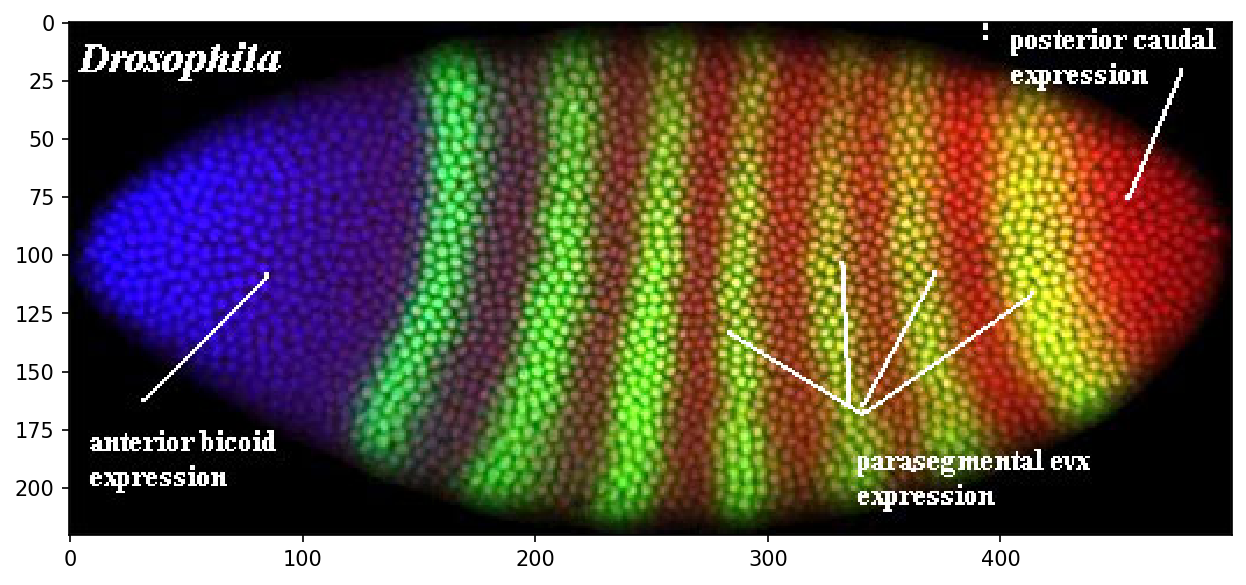

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import urllib, io
from PIL import Image


file = io.BytesIO(urllib.request.urlopen('http://palaeos.com/metazoa/glossary/images/bcd-evx-cdx.Expression.jpg').read())
img = np.array(Image.open(file))
plt.figure(num=None,figsize=(10,5),dpi=150) 
plt.imshow(img)


<b>→ Comme vu précédemment, vous pouvez également utiliser “Entrez Direct” pour accéder directement à des informations depuis un terminal UNIX ou depuis python en utilisant biopython.</b> 

In [17]:
from Bio import Medline
article_info = Entrez.efetch(db='pubmed',id='2185858',rettype='medline',retmode='text')
record = Medline.read(article_info)
print('Title: '+record['TI'])
print('Author: '+record['FAU'][0])

Title: The chemical basis of morphogenesis. 1953.
Author: Turing, A M


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>4.2 </b></font>  Connaissez-vous l'auteur de l'article dont la référence est PMID=2185858? Citez au moins un autre travail qui l'a rendu célèbre. (50 mots maximum)
</p>

Votre réponse...

## 5. Pour aller plus loin… La métagénomique

En réalité, quand est-ce qu’un biologiste se retrouve avec une séquence dont il ignore l’origine? Un cas de figure pour lequel la bioinformatique est absolument nécessaire est la “métagénomique”. Le but de la métagénomique est d’étudier le contenu génétique d’un échantillon issu d’un environnement complexe (p.ex. océan, air, sols, intestin,...). Le genre de questions auxquelles on souhaite répondre est alors, par exemple:
- Quelles sont les organismes microscopiques qui vivent dans ce sol, qui est très fertile, en comparaison avec cet autre sol qui a un rendu beaucoup plus faible?
- Quelles organismes microscopiques vivent à une certaine profondeur de l’océan?
- Quelles sont les organismes qui vivent dans notre intestin (microbiome)?
Une fois que le biologiste a extrait l’ADN de l’échantillon, c’est au bioinformaticien-ne d’identifier tous les génomes présents et d’en déduire la composition biologique. 
- Est-ce qu'un environnement est plus riche qu'un autre?

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>5.1 </b></font>  Identifiez un ou deux défis posés par la métagénomique: en quoi est-ce plus compliqué que la démarche que vous venez de suivre pour identifier une séquence inconnue? Décrivez aussi brièvement les étapes à suivre en métagénomique. (250 mots maximum)
</p>


Votre réponse...